1. На основе датасета titanic обучить дерево решений
2. Подобрать оптимальную глубину дерева так же, как мы делали на занятии
3. Определить самые важные фичи
4. Визуализировать полученное дерево

In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

C:\Users\econo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# На основе датасета titanic обучить дерево решений

### dataset

In [2]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [3]:
# train_df.head()

In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# train_df.info()

In [6]:
# test_df.info()

In [7]:
# заполним нулевые значения маркером, который точно не встречается в изначальной выборке - -999

train_df = train_df.fillna(-999)
test_df = test_df.fillna(-999)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df

In [11]:
X_train[:5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-999,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-999,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-999,S


In [12]:
y_train[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [13]:
X_test[:5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,-999,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,-999,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,-999,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,-999,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,-999,S


### lable encoding

In [14]:
cat_col_list = X_train.select_dtypes(object).columns
digit_col_list = X_train.drop(cat_col_list, axis=1).columns

In [15]:
input_x_train_cat = X_train[cat_col_list].astype(str)
input_x_train_digit = X_train[digit_col_list]

input_x_test_cat = X_test[cat_col_list].astype(str)
input_x_test_digit = X_test[digit_col_list]

In [16]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
OH_X_train = input_x_train_cat.apply(LabelEncoder().fit_transform)
OH_X_test = input_x_test_cat.apply(LabelEncoder().fit_transform)

In [17]:
X_train = pd.concat([input_x_train_digit, OH_X_train], axis=1)
X_test = pd.concat([input_x_test_digit, OH_X_test], axis=1)

Наверное был смысл изначально объяединить датасеты с возможностью дальнейшего разделения, так как все преобразования FE необходимо делать несколько раз.  
В датасете однозначно можно поработать не только над заполнением пустых значений, но и категориальными переменными. 

# ГЕНЕРИМ y_test !!! 

Так как в исходном датасете значения y_test нет, но для оценки качества предсказания он необходимо, то два пути - сделать трейн-тест сплин по тестовым данным или заполнить как-то y_test для тестовых данных.  
В данном примере я сдлелал дерево с большей глубиной для генерации этого признака. 

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
clf_test = DecisionTreeClassifier(max_depth=5)
clf_test.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
y_test = clf_test.predict(X_test)

# Задание 2:  
Взять датасет titanic (прошлое задание)  
Обучить на нем 3 модели классификации - логистическую регрессию, дерево решений и алгоритм knn  
Построить график сравнения roc-кривых моделей на тестовой выборки  
Вывести ROC AUC SCORE для каждой из моделей  

In [21]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

### DescisionTree

In [22]:
clf_final = DecisionTreeClassifier(max_depth=2)
clf_final.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
Y_predict = clf_final.predict(X_test)

In [24]:
Y_predict_proba_clf = clf_final.predict_proba(X_test)

In [25]:
roc_auc_score(y_test, Y_predict)

0.773972602739726

### LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lgr = LogisticRegression()

In [28]:
lgr = lgr.fit(X_train, y_train)

C:\Users\econo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
Y_predict = lgr.predict(X_test)

In [30]:
Y_predict_proba_lgr = lgr.predict_proba(X_test)

In [31]:
roc_auc_score(y_test, Y_predict)

0.8448579774375504

### KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier( n_neighbors = 5 )

In [34]:
knn = knn.fit(X_train, y_train)

In [35]:
Y_predict = knn.predict(X_test)

In [36]:
Y_predict_proba_knn = knn.predict_proba(X_test)

In [37]:
roc_auc_score(y_test, Y_predict)

0.6051319500402901

### AUC-ROC comparsion

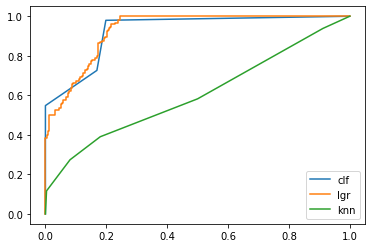

In [38]:
## SKLEARN
fpr, tpr, _ = metrics.roc_curve(y_test,  Y_predict_proba_clf[:,1])
fpr_2, tpr_2, _ = metrics.roc_curve(y_test,  Y_predict_proba_lgr[:,1])
fpr_3, tpr_3, _ = metrics.roc_curve(y_test,  Y_predict_proba_knn[:,1])
plt.plot(fpr,tpr,label="clf")
plt.plot(fpr_2,tpr_2,label="lgr")
plt.plot(fpr_3,tpr_3,label="knn")
plt.legend(loc=4)
plt.show()